<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18164\859969077.py:10: SyntaxWarning: invalid escape sequence '\p'
  file_path = 'data\processed_data_team_18.csv'  # Ensure this file is in the same directory


First few rows of the dataset:
                                   Event Name      Category Age Limit  \
0                       Subscription number 1      concerts        6+   
1  29th Baku Rhythmic Gymnastics Championship         sport        6+   
2              Creative master class for kids  master-class        3+   
3                             Neon creativity          kids        3+   
4                             The 21:15 Train       theatre        6+   

   Available Tickets  Minimum Price  Maximum Price                Event Start  \
0                314              8              8  2024-12-07 11:00:00+00:00   
1               1209              3              3  2024-12-11 08:00:00+00:00   
2               1202             14             14  2024-12-11 06:00:00+00:00   
3                335             15             18  2024-12-11 07:00:00+00:00   
4                275              8             12  2024-12-10 15:00:00+00:00   

                   Event End  \
0  2024-12-

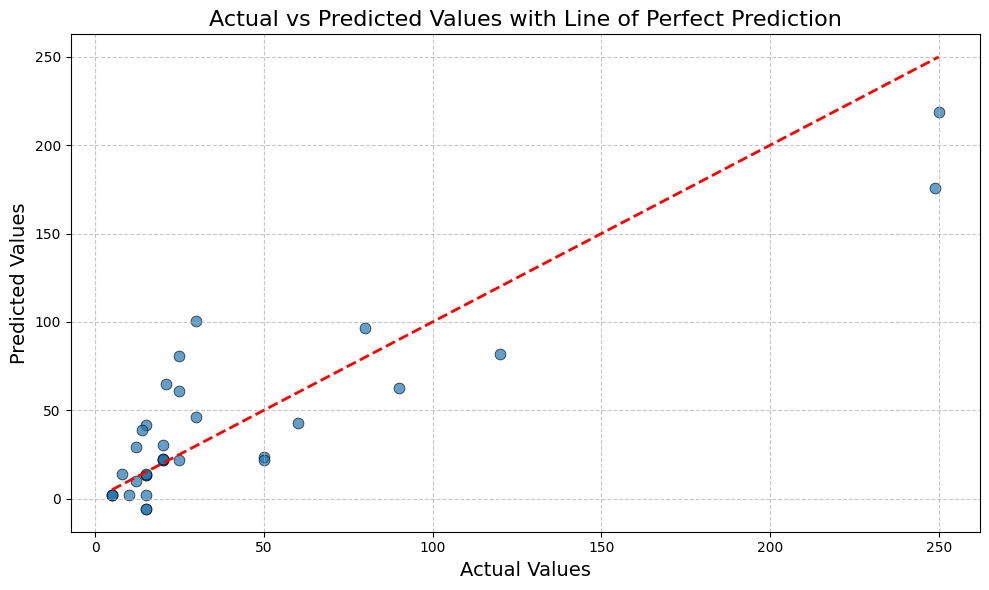

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from datetime import datetime

# Loading the dataset
file_path = 'data\processed_data_team_18.csv'  # Ensure this file is in the same directory
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Checking data types
print("Data types:")
print(data.dtypes)

# Selecting relevant numeric columns for regression
numeric_columns = [ 'Available Tickets','Minimum Price', 'Tag Count']
target_column = 'Maximum Price'

# Ensuring the selected columns are numeric
for col in numeric_columns + [target_column]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Dropping rows with missing values in the selected columns
data.dropna(subset=numeric_columns + [target_column], inplace=True)

# Checking for correlations
print("Correlation matrix:")
print(data[numeric_columns + [target_column]].corr())

# Feature matrix (X) and target variable (y)
X = data[numeric_columns]
y = data[target_column]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initializing and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Displaying the results
print("Coefficients of the model:")
for feature, coef in zip(numeric_columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

# Saving the model's predictions to a CSV file for reference
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
output.to_csv(f'predictions_team_18_{timestamp}.csv', index=False)
print(f"Predictions saved to predictions_team_18_{timestamp}.csv.")

import seaborn as sns
import numpy as np

# Enhanced visualization
plt.figure(figsize=(10, 6))

# Scatter plot of Actual vs Predicted with customizations
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, s=60, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line of perfect prediction

# Adding labels, title, and grid
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs Predicted Values with Line of Perfect Prediction', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

